In [44]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
path = r'S:\IO3-sessions\NEW STRUCTURE\de-earlyfusionthesis\Datasets'

train_dataset_path_I = os.path.abspath(os.path.join(path, 'train_dataset_method_II'))
GUT_test_path_I = os.path.join(path, 'GUT_test_method_I').replace("\\", "/")
ITU_YU_test_path_I = os.path.join(path, 'ITU_YU_test_method_I').replace("\\", "/")
MAAP_test_path_I = os.path.join(path, 'MAAP_test_method_I').replace("\\", "/")

train_dataset_path_II = os.path.abspath(os.path.join(path, 'train_dataset_method_II'))
GUT_test_path_II = os.path.join(path, 'GUT_test_method_II').replace("\\", "/")
ITU_YU_test_path_II = os.path.join(path, 'ITU_YU_test_method_II').replace("\\", "/")
MAAP_test_path_II = os.path.join(path, 'MAAP_test_method_II').replace("\\", "/")

# Load datasets
train_I = tf.data.Dataset.load(train_dataset_path_I)
GUT_test_I = tf.data.Dataset.load(GUT_test_path_I)
ITU_YU_test_I = tf.data.Dataset.load(ITU_YU_test_path_I)
MAAP_test_I = tf.data.Dataset.load(MAAP_test_path_I)

train_II = tf.data.Dataset.load(train_dataset_path_II)
GUT_test_II = tf.data.Dataset.load(GUT_test_path_II)
ITU_YU_test_II = tf.data.Dataset.load(ITU_YU_test_path_II)
MAAP_test_II = tf.data.Dataset.load(MAAP_test_path_II)

full_test_I = GUT_test_I.concatenate(ITU_YU_test_I).concatenate(MAAP_test_I)
full_test_II = GUT_test_II.concatenate(ITU_YU_test_II).concatenate(MAAP_test_II)

In [48]:
emotions = ["Happy", "Sad", "Angry", "Fear", "Disgusted", "Surprised"]

## MODEL I

In [4]:
def custom_masking(inputs):
    # Create a mask where any feature being 0 masks the entire time step
    mask = tf.reduce_all(tf.not_equal(inputs, 0.0), axis=-1)  # True if no feature is 0
    return tf.where(mask[:, :, tf.newaxis], inputs, tf.zeros_like(inputs))

In [5]:
model_method_I = tf.keras.models.load_model('//153.19.52.107/emboa/IO3-sessions/NEW STRUCTURE/de-earlyfusionthesis/Models/model_method_I/model.keras', custom_objects={'custom_masking': custom_masking})

In [6]:
model_method_I.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 20, 515)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 20, 128)        │       296,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 20, 32)         │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20, 6)          │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 903,860 (3.45 MB)

 Trainable params: 301,286 (1.15 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 602,574 (2.30 MB)

In [7]:
test_set = full_test_I
# Getting predictions (chat)
y_pred = model_method_I.predict(test_set.map(lambda x, _: x))
y_true = tf.concat([y for _, y in test_set], axis=0)

49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 663ms/step


In [8]:
categorical_accuracy = tf.keras.metrics.CategoricalAccuracy()
categorical_accuracy.update_state(y_true, y_pred)
print(f"Categorical Accuracy: {categorical_accuracy.result().numpy()}")

Categorical Accuracy: 0.9842696189880371


In [9]:
y_true_indices = np.argmax(y_true.numpy(), axis=-1).flatten()
y_pred_indices = np.argmax(y_pred, axis=-1).flatten()

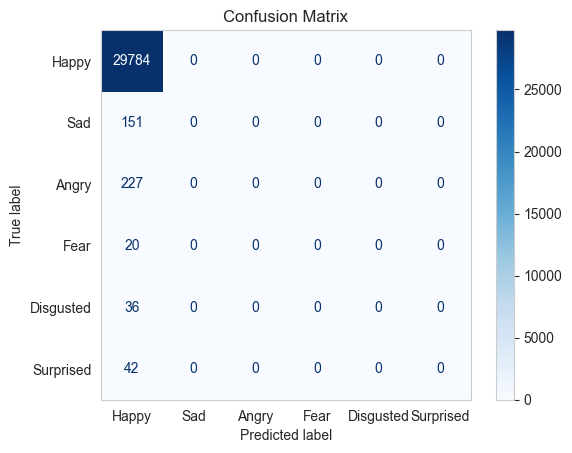

In [19]:
cm = confusion_matrix(y_true_indices, y_pred_indices)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)
disp.plot(cmap='Blues', values_format='')
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [23]:
for i, emotion in enumerate(emotions):
    
    # Precision, Recall, F1 for this class
    true_class = (y_true_indices == i)
    pred_class = (y_pred_indices == i)
    precision = np.sum(true_class & pred_class) / np.sum(pred_class)
    recall = np.sum(true_class & pred_class) / np.sum(true_class)
    f1 = 2 * (precision * recall) / (precision + recall)
    
    print(f"Metrics for {emotion}:")
    print(f"  Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Metrics for Happy:
  Precision: 1.00, Recall: 1.00, F1-Score: 1.00
Metrics for Sad:
  Precision: nan, Recall: nan, F1-Score: nan
Metrics for Angry:
  Precision: nan, Recall: nan, F1-Score: nan
Metrics for Fear:
  Precision: nan, Recall: nan, F1-Score: nan
Metrics for Disgusted:
  Precision: nan, Recall: nan, F1-Score: nan
Metrics for Surprised:
  Precision: nan, Recall: nan, F1-Score: nan


C:\Users\oskik\AppData\Local\Temp\ipykernel_17356\3298553603.py:6: RuntimeWarning: invalid value encountered in scalar divide
  precision = np.sum(true_class & pred_class) / np.sum(pred_class)
C:\Users\oskik\AppData\Local\Temp\ipykernel_17356\3298553603.py:7: RuntimeWarning: invalid value encountered in scalar divide
  recall = np.sum(true_class & pred_class) / np.sum(true_class)


## MODEL II

In [49]:
model_method_II = tf.keras.models.load_model('//153.19.52.107/emboa/IO3-sessions/NEW STRUCTURE/de-earlyfusionthesis/Models/model_method_II/model.keras')

In [50]:
model_method_II.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 10, 64)         │       148,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10, 6)          │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 452,276 (1.73 MB)

 Trainable params: 150,758 (588.90 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 301,518 (1.15 MB)

In [51]:
import tensorflow as tf
test_set = MAAP_test_II
# Getting predictions (chat)
y_pred = model_method_II.predict(test_set.map(lambda x, _: x))
y_true = tf.concat([y for _, y in test_set], axis=0)

def compute_mse(y_true, y_pred):
    """Mean Squared Error"""
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    return mse.numpy()

def compute_mae(y_true, y_pred):
    """Mean Absolute Error"""
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    return mae.numpy()

def compute_rmse(y_true, y_pred):
    """Root Mean Squared Error"""
    mse = compute_mse(y_true, y_pred)
    rmse = tf.sqrt(mse)
    return rmse.numpy()

def compute_r2(y_true, y_pred):
    """R² Score"""
    total_variance = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    residual_variance = tf.reduce_sum(tf.square(y_true - y_pred))
    r2 = 1 - (residual_variance / total_variance)
    return r2.numpy()

def compute_similarity(y_true, y_pred):
    """Similarity"""
        # Compute the similarity: 1 - |true - prediction|
    similarity = 1 - tf.abs(y_true - y_pred)

    # Compute Mean Average Similarity (MAS)
    mas = tf.reduce_mean(similarity)
    
    return mas.numpy()
    
# Computing Metrics for Each Emotion
metric_results = []
# Function
def compute_metrics(y_true, y_pred, emotion_index, metric_results):
    # Ensure tensors are of the same type cause some bugs idk
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    
    # Extract true and predicted values for the specific emotion
    true_values = y_true[:, :, emotion_index]
    pred_values = y_pred[:, :, emotion_index]
    
    # Create a mask for non-zero true values (bylo na wloskich zajeciach)
    mask = tf.not_equal(true_values, 0)
    
    # Apply the mask
    true_values_masked = tf.boolean_mask(true_values, mask)
    pred_values_masked = tf.boolean_mask(pred_values, mask)
    
    mse = compute_mse(true_values_masked, pred_values_masked)
    mae = compute_mae(true_values_masked, pred_values_masked)
    rmse = compute_rmse(true_values_masked, pred_values_masked)
    r2 = compute_r2(true_values_masked, pred_values_masked)
    similarity = compute_similarity(true_values_masked, pred_values_masked)
    
    # Store results
    metric_results.append({
        'emotion': emotion,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    })
    
    print(f"Metrics for {emotion}: MSE = {mse}, MAE = {mae}, RMSE = {rmse}, R² = {r2}")
    
    # How many labels were used for this metric
    label_count = tf.size(true_values_masked).numpy()
    
    return label_count, metric_results

# List for emotions
label_counts = []


    label_count = compute_metrics(y_true, y_pred, i, metric_results)
    label_counts.append(label_count)
    print(f"Similarity for {emotion}: {mas}, Labels Used = {label_count}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step
Similarity for Happy: 0.6910640001296997, Labels Used = 8554
Similarity for Sad: 0.7129199504852295, Labels Used = 784
Similarity for Angry: 0.6585703492164612, Labels Used = 572
Similarity for Fear: 0.6640673875808716, Labels Used = 339
Similarity for Disgusted: 0.6474618911743164, Labels Used = 261
Similarity for Surprised: 0.6666855216026306, Labels Used = 341


In [54]:
test_set = full_test_II
# Getting predictions (chat)
y_pred = model_method_II.predict(test_set.map(lambda x, _: x))
y_true = tf.concat([y for _, y in test_set], axis=0)
# Helper function to compute metrics for a single emotion
def compute_all_metrics(y_true, y_pred):
    """
    Compute MAS, MSE, MAE, RMSE, and R² for masked values of y_true and y_pred.
    
    Args:
        y_true (tf.Tensor): Ground truth values after masking.
        y_pred (tf.Tensor): Predicted values after masking.
    
    Returns:
        dict: A dictionary with computed metrics.
    """
    def compute_mse(y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred)).numpy()

    def compute_mae(y_true, y_pred):
        return tf.reduce_mean(tf.abs(y_true - y_pred)).numpy()

    def compute_rmse(y_true, y_pred):
        mse = tf.reduce_mean(tf.square(y_true - y_pred))
        return tf.sqrt(mse).numpy()

    def compute_r2(y_true, y_pred):
        total_variance = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
        residual_variance = tf.reduce_sum(tf.square(y_true - y_pred))
        return (1 - residual_variance / total_variance).numpy()

    def compute_similarity(y_true, y_pred):
        similarity = 1 - tf.abs(y_true - y_pred)
        mas = tf.reduce_mean(similarity).numpy()
        label_count = tf.size(y_true).numpy()
        return mas, label_count

    # Compute metrics
    mse = compute_mse(y_true, y_pred)
    mae = compute_mae(y_true, y_pred)
    rmse = compute_rmse(y_true, y_pred)
    r2 = compute_r2(y_true, y_pred)
    mas, label_count = compute_similarity(y_true, y_pred)

    return {
        'MAS': mas,
        'Labels Used': label_count,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2
    }

# Main loop to compute metrics for all emotions
def compute_metrics_for_all_emotions(y_true, y_pred, emotions):
    """
    Compute all metrics for each emotion.
    
    Args:
        y_true (tf.Tensor): Ground truth values (shape: [batch_size, sequence_length, num_emotions]).
        y_pred (tf.Tensor): Predicted values (shape: [batch_size, sequence_length, num_emotions]).
        emotions (list): List of emotion names.
    
    Returns:
        list: A list of dictionaries containing metrics for each emotion.
    """
    metric_results = []

    for i, emotion in enumerate(emotions):
        # Extract true and predicted values for the specific emotion
        true_values = tf.cast(y_true[:, :, i], tf.float32)
        pred_values = tf.cast(y_pred[:, :, i], tf.float32)
        
        # Mask non-zero true values
        # mask = tf.not_equal(true_values, 0)
        # true_values_masked = tf.boolean_mask(true_values, mask)
        # pred_values_masked = tf.boolean_mask(pred_values, mask)
        
        # Compute all metrics using the helper function
        metrics = compute_all_metrics(true_values, pred_values)
        metrics['emotion'] = emotion  # Add emotion name to the result
        
        # Append to results
        metric_results.append(metrics)

        # Print for immediate feedback
        print(f"Emotion: {emotion}, Metrics: {metrics}")

    return metric_results

# Example Usage
# Assuming `emotions` is a list of emotion names, and `y_true` and `y_pred` are already defined
results = compute_metrics_for_all_emotions(y_true, y_pred, emotions)

# Results are already printed inside the loop


49/49 ━━━━━━━━━━━━━━━━━━━━ 13s 246ms/step
Emotion: Happy, Metrics: {'MAS': 0.81424594, 'Labels Used': 30260, 'MSE': 0.07381781, 'MAE': 0.18575408, 'RMSE': 0.27169433, 'R²': 0.13560373, 'emotion': 'Happy'}
Emotion: Sad, Metrics: {'MAS': 0.9765577, 'Labels Used': 30260, 'MSE': 0.0051208, 'MAE': 0.023442365, 'RMSE': 0.071559764, 'R²': -0.003008008, 'emotion': 'Sad'}
Emotion: Angry, Metrics: {'MAS': 0.97591156, 'Labels Used': 30260, 'MSE': 0.0059645013, 'MAE': 0.024088474, 'RMSE': 0.077230185, 'R²': -0.0022090673, 'emotion': 'Angry'}
Emotion: Fear, Metrics: {'MAS': 0.9866006, 'Labels Used': 30260, 'MSE': 0.0021546085, 'MAE': 0.013399397, 'RMSE': 0.04641776, 'R²': -0.20613396, 'emotion': 'Fear'}
Emotion: Disgusted, Metrics: {'MAS': 0.99172884, 'Labels Used': 30260, 'MSE': 0.0020438137, 'MAE': 0.0082711745, 'RMSE': 0.04520856, 'R²': -0.16049123, 'emotion': 'Disgusted'}
Emotion: Surprised, Metrics: {'MAS': 0.98520696, 'Labels Used': 30260, 'MSE': 0.0037332436, 'MAE': 0.014793016, 'RMSE': 0.06